{}
1 [2, 3, 4]
2
3
4
2 [3]
3
3 [4, 5]
4
5
4 [5, 6, 7]
5
6
7
5 [7, 8]
7
8
6 [8]
8
7 [9, 10]
9
10
8 [9, 10, 11]
9
10
11
9 [11]
11
10 [11]
11
11 []
Nodes of graph: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Edges of graph: 
[(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 7), (5, 8), (6, 8), (7, 9), (7, 10), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11)]


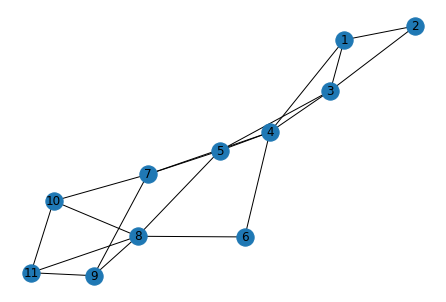

CPU times: user 507 ms, sys: 77.2 ms, total: 584 ms
Wall time: 331 ms


In [328]:
%%time

import networkx as nx


class Vertex:
    def __init__(self, name):
        self.name = name
        self.adjacent_nodes = [] 
        
        
    def add_vertices(self, vertices):
        for vertex in vertices:
            if isinstance(vertex, Vertex) and vertex not in self.adjacent_nodes:
                self.adjacent_nodes.append(vertex)
#                 vertex.add_vertices([self])

#     def __repr__(self):
#         adjacent_nodes_list = []
#         for vertex in self.adjacent_nodes:
#             adjacent_nodes_list.append(vertex.name)
#         return str(adjacent_nodes_list)
    
    def get_node_list(self):
        adjacent_nodes_list = []
        for vertex in self.adjacent_nodes:
            adjacent_nodes_list.append(vertex.name)
        return adjacent_nodes_list
    
    
class Graph:
    def __init__(self):
        self.vertices_object = {}
        self.vertices_name = {}
    
    
    def add_vertices(self, vertices):
        for vertex in vertices:
            if isinstance(vertex, Vertex):
                self.vertices_object[vertex.name] = vertex.adjacent_nodes
                self.vertices_name[vertex.name] = vertex.get_node_list()
                
    def dfs_paths(self, start, goal, path=None):
        if path is None:
            path = [start]
#             print(f'First statement {path}')
#             print(self.vertices_name[start])
#             print(set(path))
#             print(set(self.vertices_name[start]) - set(path), '\n')
        if start == goal:
            yield path
        for next in set(self.vertices_name[start]) - set(path):
            yield from self.dfs_paths(next, goal, path + [next])
            
    def find_shortest_path_dfs(self, start, goal, path=None): 
        all_pathes = list(self.dfs_paths(start, goal, path=None))
#         print(*all_pathes, sep='\n')
        min_list = min(all_pathes, key = len) 
#         print(list(map(len, all_pathes)))
        min_length = min(map(len, all_pathes)) 
        print(f'The shortes path from vertex({start}) to vertex({goal}) by using DFS algorithm: {min_list}') 
        
        
    def bfs_paths(self, start, goal):
        queue = [(start, [start])]
        while queue:
            (vertex, path) = queue.pop(0)
            for next in set(self.vertices_name[vertex]) - set(path):
                if next == goal:
                    yield path + [next]
                else:
                    queue.append((next, path + [next]))
                    
                    
    def find_shortest_path_bfs(self, start, goal):
        try:
            shortes_path = next(self.bfs_paths(start, goal))
            return shortes_path
        except StopIteration:
            return None
        
#         print(f'The shortes path from vertex({start}) to vertex({goal}) by using BFS algorithm: {shortes_path}')
                    
    
                
                

                
strings_name = ['one', 
                'two',
                'three',
                'four',
                'five',
                'six',
                'seven',
                'eight',
                'nine',
                'ten',
                'eleven']

string_value = [1,2,3,4,5,6,7,8,9,10,11]

vertices = dict(zip(strings_name, string_value))
# print(vertices)

for key, val in vertices.items():
    # Covert string to variable name
    globals()[key] = Vertex(val)

one.add_vertices([two, three, four]) 
two.add_vertices([three]) 
three.add_vertices([four, five]) 
four.add_vertices([five, six, seven])
five.add_vertices([seven, eight])
six.add_vertices([eight])
seven.add_vertices([nine, ten])
eight.add_vertices([nine, ten, eleven]) 
nine.add_vertices([eleven])
ten.add_vertices([eleven])

vertex_list = [one,
               two,
               three,
               four,
               five,
               six,
               seven,
               eight,
               nine,
               ten,
               eleven]


import matplotlib.pyplot as plt

g = Graph()
# print(g.vertices_name)
# print()

g.add_vertices(vertex_list)

graph = nx.Graph()

graph.add_nodes_from(string_value)

for k, vs in g.vertices_name.items():
    print(k, vs)
    vertex_name = k

    for v in vs:
        print(v)
        graph.add_edge(k, v)
        

    
print("Nodes of graph: ")
print(graph.nodes())
print("Edges of graph: ")
print(graph.edges())

nx.draw(graph, with_labels= True)
plt.savefig("path_graph_cities.png")
plt.show()




# graph.add_edge(1, 2)
# graph.add_edge(1, 3)
# graph.add_edge(1 ,4)
# graph.add_edge(2, 3)
# graph.add_edge(3, 4)
# graph.add_edge(3, 5)
# graph.add_edge(4, 5)
# graph.add_edge(4, 6)
# graph.add_edge(4, 7)



# nx.draw_networkx(graph, with_label = True)



# cities = {0:"Toronto",1:"London",2:"Berlin",3:"New York"}

# nx.relabel_nodes(G,cities, copy=False)
 
# nx.draw(graph, with_labels= True)
# plt.savefig("path_graph_cities.png")
# plt.show()

# print(g.vertices_object)
# print(g.vertices_name)


In [286]:
%%time
g.find_shortest_path_dfs(1, 11)

The shortes path from vertex(1) to vertex(11) by using DFS algorithm: [1, 3, 5, 8, 11]
CPU times: user 391 µs, sys: 84 µs, total: 475 µs
Wall time: 448 µs


In [229]:
%%time
g.find_shortest_path_bfs(1, 11)

The shortes path from vertex(1) to vertex(11) by using BFS algorithm: [1, 3, 5, 8, 11]
CPU times: user 202 µs, sys: 61 µs, total: 263 µs
Wall time: 247 µs


[1, 3, 5, 8, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
['blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue']


KeyError: 0

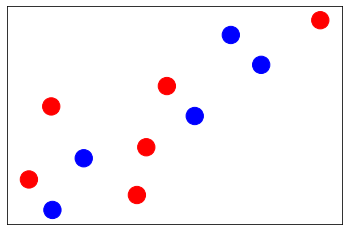

In [316]:
import networkx as nx
import matplotlib.pyplot as plt



shortest_path = g.find_shortest_path_bfs(1, 11)
print(shortest_path)

print(graph.nodes())

node_colors = ["blue" if n in shortest_path else "red" for n in graph.nodes()]
print(node_colors)



vert = dict(zip(string_value, strings_name))

pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos=pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_labels(graph, pos=pos, labels=vert )
plt.axis("off")
plt.show()

# g.add_vertices(vertex_list)

# graph = nx.Graph()

# graph.add_nodes_from(string_value)

# for k, vs in g.vertices_name.items():
#     print(k, vs)
#     vertex_name = k

#     for v in vs:
#         print(v)
#         graph.add_edge(k, v)
    
# print("Nodes of graph: ")
# print(graph.nodes())
# print("Edges of graph: ")
# print(graph.edges())

# nx.draw(graph, with_labels= True)
# plt.savefig("path_graph_cities.png")
# plt.show()

NetworkXError: Node 0 has no position.

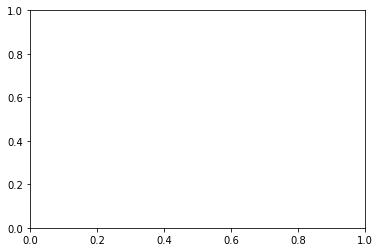

In [329]:
import matplotlib.pyplot as plt
import networkx as nx

graph = nx.Graph()
graph.add_nodes_from(string_value)
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
options = {"node_size": 500, "alpha": 0.8}
nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3], node_color="r", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="b", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
    width=8,
    alpha=0.5,
    edge_color="r",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
    width=8,
    alpha=0.5,
    edge_color="b",
)



# some math labels
labels = {}
labels[0] = r"$dsds$"
labels[1] = r"$b$"
labels[2] = r"$c$"
labels[3] = r"$d$"
labels[4] = r"$\alpha$"
labels[5] = r"$\beta$"
labels[6] = r"$\gamma$"
labels[7] = r"$\delta$"
print(labels)
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis("off")
plt.show()

[1, 3, 5, 8, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[2, 4, 6, 7, 9, 10]
[1, 3, 5, 8, 11]
0
1
2
3
[(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 7), (5, 8), (6, 8), (7, 9), (7, 10), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11)]
[(1, 3), (3, 5), (5, 8), (8, 11)]
[(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 7), (5, 8), (6, 8), (7, 9), (7, 10), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11)]
[(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 7), (5, 8), (6, 8), (7, 9), (7, 10), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11)]
{1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11'}


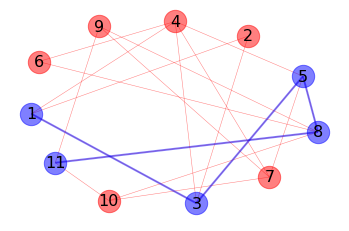

In [390]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(string_value)
pos = nx.spring_layout(G)



shortest_path = g.find_shortest_path_bfs(1, 11)
print(shortest_path)
print(string_value)

rest_nodes = [i for i in string_value if i  not in shortest_path]
print(rest_nodes)


# nodes
options = {"node_size": 500, "alpha": 0.5}
nx.draw_networkx_nodes(G, pos, nodelist=rest_nodes, node_color="r", **options)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color="b", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

g = Graph()
# print(g.vertices_name)
# print()

g.add_vertices(vertex_list)

print(shortest_path)

shortest_path_edges = []
rest_nodes_edges = []
total_edges = []
for k,v in g.vertices_name.items():
    for i in v:
        total_edges.append((k, i))
        
#     if k in shortest_path:
#         for i in v:
#             shortest_path_edges.append((k,i))
#     else:
#         for i in v:
#             rest_nodes_edges.append((k,i))

shortest_path_edges = []
#[1, 3, 5, 8, 11]


for i in range(0,len(shortest_path)):
    if i != len(shortest_path) - 1:
        print(i)
        shortest_path_edges.append((shortest_path[i], shortest_path[i+1])) 
        
rest_nodes_edges  = [edge for edge in total_edges if edge is not shortest_path_edges]
print(rest_nodes_edges)
    
print(shortest_path_edges)
    
# for node in shortest_path:
#     shortest_path_edges.append((node,shortest_path ))
    
    
print(rest_nodes_edges)
print(total_edegs)


nx.draw_networkx_edges(
    G,
    pos,
    edgelist=rest_nodes_edges,
    width=0.5,
    alpha=0.5,
    edge_color="r",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=shortest_path_edges,
    width=2,
    alpha=0.5,
    edge_color="b",
)

# some math labels
labels = {}
labels[1] = "1"
labels[2] = "2"
labels[3] = "3"
labels[4] = "4"
labels[5] = "5"
labels[6] = "6"
labels[7] = "7"
labels[8] = "8"
labels[9] = "9"
labels[10] = "10"
labels[11] = "11"
print(labels)
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis("off")
plt.show()


